# **Problem statement: Create a classification model to predict whether price range of mobile based on certain specifications**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Mobile_price_range_data.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.shape

(2000, 21)

In [ ]:
df.isnull().sum
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [ ]:
x = df[['ram']]
y = df['price_range']
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
print(x.shape)
print(y.shape)

(2000, 1)
(2000,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size = 0.25)
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)

(1500, 1)
(500, 1)
(1500,)
(500,)


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression()
m1.fit(x_tr,y_tr)

LogisticRegression()

In [ ]:
# Model score in classification is Accuracy
print('Training Score',m1.score(x_tr,y_tr))
print('Testing Score',m1.score(x_te,y_te))

Training Score 0.7566666666666667
Testing Score 0.75


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
ypred = m1.predict(x_te)
print(ypred)

[2 3 0 2 1 2 0 2 3 1 1 1 3 2 0 1 3 0 0 1 2 3 1 2 3 2 2 2 1 0 2 3 3 0 1 3 2
 3 0 3 0 1 2 0 1 0 3 1 1 2 3 3 3 0 1 0 2 1 3 0 2 0 1 0 2 1 1 0 2 3 2 0 3 2
 0 1 2 2 0 3 2 0 3 3 2 1 3 2 0 2 2 3 1 3 3 0 0 0 3 1 2 3 1 1 2 3 0 2 1 2 0
 1 0 2 1 1 1 0 2 2 2 1 1 0 2 3 0 0 2 0 1 2 0 1 1 0 2 1 2 3 2 1 0 2 2 3 1 2
 3 1 0 0 0 1 1 3 0 2 3 2 3 2 1 0 0 0 3 2 2 3 2 3 3 2 0 1 0 0 2 2 1 2 3 2 2
 2 3 0 0 3 1 1 2 0 2 3 3 0 2 0 2 2 1 3 1 0 3 1 3 2 3 0 1 3 3 2 3 2 1 3 2 2
 2 1 2 3 2 2 0 0 0 1 1 3 1 1 3 3 1 2 0 0 2 1 2 2 2 0 3 0 1 2 1 0 3 2 1 3 0
 0 0 3 1 2 3 0 1 1 1 0 3 1 1 3 0 2 3 1 1 3 3 0 3 3 1 3 0 0 0 2 2 1 2 3 0 3
 2 3 1 1 3 2 3 2 2 3 1 1 0 1 1 2 1 3 2 2 1 3 0 0 3 0 1 0 3 0 1 1 0 1 1 3 1
 3 2 3 3 2 3 1 3 0 3 0 2 0 1 0 1 3 1 2 0 1 3 1 2 3 0 0 2 3 3 3 0 2 1 3 3 0
 0 0 0 0 3 2 2 1 2 1 2 0 1 1 1 3 0 2 3 0 0 2 2 0 3 1 0 1 0 3 0 1 3 1 1 3 3
 3 3 2 2 2 2 1 2 3 1 2 3 0 1 0 2 2 1 0 3 0 0 3 2 0 0 1 3 1 0 3 0 3 2 3 1 0
 3 3 2 2 3 3 3 0 0 1 3 3 2 3 0 0 2 2 1 3 0 1 2 2 0 0 3 3 2 0 3 0 3 0 2 2 3
 1 3 2 0 1 2 2 3 2 1 3 3 

In [ ]:
cm = confusion_matrix(y_te,ypred)
print(cm)
print(classification_report(y_te,ypred))


[[107  18   0   0]
 [ 18  79  22   0]
 [  0  18  82  24]
 [  0   0  25 107]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       125
           1       0.69      0.66      0.68       119
           2       0.64      0.66      0.65       124
           3       0.82      0.81      0.81       132

    accuracy                           0.75       500
   macro avg       0.75      0.75      0.75       500
weighted avg       0.75      0.75      0.75       500



In [ ]:
lr_ac= accuracy_score(y_test,y_pred)

In [ ]:
lr_ac

0.7

# **Applying KNN**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.iloc[:,13:21]

,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,2549,9,7,19,0,0,1,1
1,2631,17,3,7,1,1,0,2
2,2603,11,2,9,1,1,0,2
3,2769,16,8,11,1,0,0,2
4,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...
1995,668,13,4,19,1,1,0,0
1996,2032,11,10,16,1,1,1,2
1997,3057,9,1,5,1,1,0,3
1998,869,18,10,19,1,1,1,0


In [ ]:
df.isnull().sum
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [ ]:
x.head()

,ram
0,2549
1,2631
2,2603
3,2769
4,1411


In [ ]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [ ]:
x = x.values

In [ ]:
x

array([[2549],
       [2631],
       [2603],
       ...,
       [3057],
       [ 869],
       [3919]])

In [ ]:
y = df.iloc[:,-1].values

In [ ]:
y

array([1, 2, 2, ..., 3, 0, 3])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1500, 1)
(500, 1)
(1500,)
(500,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN = KNeighborsClassifier()

In [ ]:
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred = KNN.predict(x_test)

In [ ]:
y_pred

array([0, 3, 3, 0, 2, 3, 3, 0, 1, 3, 0, 2, 3, 0, 1, 1, 3, 3, 0, 0, 0, 3,
       2, 3, 1, 0, 3, 2, 1, 2, 3, 2, 0, 1, 2, 2, 0, 0, 0, 2, 2, 1, 2, 3,
       1, 3, 3, 2, 3, 2, 3, 0, 0, 1, 2, 1, 3, 1, 0, 0, 0, 1, 0, 0, 0, 3,
       2, 2, 0, 1, 3, 0, 0, 2, 3, 1, 1, 3, 2, 2, 3, 3, 0, 2, 3, 3, 3, 2,
       0, 1, 0, 3, 3, 3, 1, 2, 1, 0, 3, 3, 2, 3, 2, 0, 1, 1, 2, 2, 0, 3,
       3, 2, 1, 2, 0, 1, 3, 1, 3, 0, 0, 3, 1, 3, 0, 3, 2, 0, 1, 2, 0, 0,
       0, 3, 0, 0, 1, 1, 2, 1, 3, 0, 1, 1, 3, 0, 2, 0, 1, 2, 3, 3, 0, 0,
       0, 1, 0, 3, 0, 3, 3, 1, 1, 1, 0, 2, 3, 0, 1, 2, 2, 1, 2, 1, 3, 2,
       1, 0, 1, 0, 0, 3, 0, 0, 3, 0, 2, 3, 3, 1, 3, 1, 0, 2, 3, 3, 0, 2,
       3, 3, 2, 3, 1, 1, 0, 1, 1, 0, 1, 0, 0, 2, 3, 0, 1, 2, 2, 0, 2, 1,
       3, 1, 2, 0, 2, 2, 0, 2, 0, 1, 3, 2, 0, 2, 2, 3, 2, 2, 0, 3, 0, 1,
       3, 3, 3, 1, 2, 3, 2, 2, 3, 2, 0, 3, 3, 2, 0, 2, 3, 2, 1, 1, 3, 2,
       0, 3, 0, 2, 0, 1, 0, 3, 0, 1, 3, 1, 1, 0, 0, 1, 3, 0, 0, 3, 0, 3,
       1, 2, 0, 3, 1, 2, 1, 3, 1, 0, 2, 1, 1, 0, 0,

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test.reshape(-1,1), y_pred))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       128
           1       0.59      0.54      0.56       125
           2       0.58      0.54      0.56       112
           3       0.84      0.84      0.84       135

    accuracy                           0.70       500
   macro avg       0.69      0.69      0.69       500
weighted avg       0.69      0.70      0.70       500



In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
print('Cross val',cross_val_score(KNN,y_test.reshape(-1,1),y_pred , cv = 10))
print('Cross val',np.mean(cross_val_score(KNN,y_test.reshape(-1,1),y_pred)))

Cross val [0.76 0.6  0.64 0.78 0.74 0.6  0.6  0.64 0.68 0.6 ]
Cross val 0.6359999999999999


In [ ]:
y_test

array([0, 3, 3, 0, 2, 3, 2, 0, 2, 3, 0, 3, 3, 0, 1, 2, 2, 3, 0, 1, 0, 3,
       2, 2, 1, 0, 3, 2, 1, 3, 3, 2, 0, 2, 2, 2, 0, 0, 0, 3, 2, 1, 2, 3,
       1, 3, 3, 3, 3, 2, 2, 0, 1, 2, 1, 1, 3, 1, 1, 0, 0, 2, 0, 0, 0, 3,
       2, 1, 1, 1, 3, 1, 0, 2, 2, 1, 1, 3, 2, 1, 3, 3, 0, 2, 3, 3, 2, 3,
       1, 0, 0, 3, 2, 3, 1, 3, 0, 0, 3, 3, 2, 3, 2, 0, 1, 0, 3, 2, 0, 3,
       3, 1, 1, 2, 1, 1, 3, 2, 2, 0, 0, 3, 0, 2, 2, 3, 2, 0, 1, 2, 0, 1,
       1, 3, 0, 0, 0, 1, 1, 0, 3, 0, 1, 2, 3, 0, 3, 0, 1, 2, 3, 3, 0, 0,
       0, 1, 0, 3, 0, 3, 3, 2, 1, 2, 0, 2, 2, 0, 1, 1, 1, 0, 3, 1, 3, 2,
       1, 0, 0, 0, 1, 3, 1, 0, 3, 0, 2, 3, 3, 1, 2, 1, 0, 2, 3, 3, 0, 2,
       3, 3, 1, 3, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 3, 0, 1, 2, 2, 0, 1, 1,
       3, 1, 2, 0, 2, 3, 0, 2, 0, 1, 3, 2, 0, 2, 2, 3, 1, 2, 0, 3, 1, 2,
       3, 3, 3, 1, 2, 3, 1, 2, 3, 2, 0, 3, 3, 2, 1, 3, 2, 2, 0, 2, 3, 2,
       0, 3, 0, 2, 0, 1, 1, 3, 0, 1, 2, 0, 1, 0, 2, 1, 3, 0, 0, 3, 0, 3,
       1, 3, 1, 3, 1, 2, 1, 2, 2, 0, 2, 2, 1, 1, 1,

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
knn_ac = accuracy_score(y_test,y_pred)

In [ ]:
knn_ac

0.7

# Applying SVM


In [ ]:
from sklearn.svm import SVC

In [ ]:
m1 = SVC(kernel='linear',C=0.1)
m1.fit(x_tr,y_tr)

SVC(C=0.1, kernel='linear')

In [ ]:
print('Training Score',m1.score(x_tr,y_tr))
print('Testing Score',m1.score(x_te,y_te))

Training Score 0.7546666666666667
Testing Score 0.754


In [ ]:
ypred_m1 = m1.predict(x_te)
print(ypred_m1)

[0 0 2 3 2 3 1 3 0 2 0 0 0 0 1 2 2 1 1 1 2 3 1 2 2 3 0 3 0 0 3 3 3 3 3 3 0
 1 3 1 3 1 1 3 2 1 1 3 2 3 1 1 3 3 0 1 1 0 2 3 2 0 1 0 2 3 2 0 3 2 0 2 0 1
 3 2 0 0 0 1 3 0 3 2 2 1 1 0 3 0 3 3 0 3 1 3 3 1 1 0 2 0 3 1 2 2 3 2 0 0 0
 0 1 1 2 1 0 2 2 0 0 1 0 1 1 2 3 3 2 3 1 2 2 1 2 1 2 0 1 1 0 1 0 0 0 2 1 2
 0 1 1 3 0 3 2 1 1 1 3 2 0 3 1 3 3 2 3 0 1 0 2 3 1 3 3 1 1 3 1 0 3 2 0 1 0
 2 0 2 2 0 1 3 0 0 1 2 0 1 3 2 2 1 3 1 3 3 3 0 1 0 0 3 1 2 3 0 1 1 1 2 1 1
 2 3 1 0 3 2 1 1 2 3 0 2 2 1 3 0 1 3 2 0 1 0 1 2 0 2 1 1 3 3 0 1 2 2 2 2 2
 3 3 1 3 0 0 1 1 2 1 2 1 3 3 1 2 2 1 1 1 2 2 0 2 0 3 2 1 2 0 3 2 3 1 2 3 1
 0 0 2 2 0 3 1 3 1 2 2 1 1 1 1 1 0 2 2 1 0 0 2 3 2 3 2 0 0 3 0 2 3 3 3 3 1
 2 2 1 1 1 2 3 2 0 1 3 2 3 2 1 3 3 2 1 0 1 0 3 3 0 0 2 3 2 2 0 3 0 1 2 3 3
 3 1 3 1 3 3 2 2 0 0 0 0 2 1 2 3 3 0 1 1 2 0 0 1 2 0 3 1 2 2 0 0 1 3 3 2 2
 3 2 2 0 2 0 3 2 1 1 0 2 1 3 3 0 0 0 3 2 3 0 1 0 0 1 3 3 1 2 3 0 0 2 3 2 1
 1 3 2 3 0 1 3 3 2 3 3 0 3 3 2 3 1 2 3 0 1 3 2 3 2 1 2 1 1 0 3 1 3 0 0 2 1
 0 0 1 1 0 0 1 1 1 0 0 1 

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
cm_m1 = confusion_matrix(y_te,ypred_m1)
print(cm_m1)
print(classification_report(y_te,ypred_m1))

[[103  17   0   0]
 [ 18  93  23   0]
 [  0  25  81  25]
 [  0   0  15 100]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       120
           1       0.69      0.69      0.69       134
           2       0.68      0.62      0.65       131
           3       0.80      0.87      0.83       115

    accuracy                           0.75       500
   macro avg       0.76      0.76      0.76       500
weighted avg       0.75      0.75      0.75       500



In [ ]:
m2 = SVC(kernel='rbf',gamma=1,C=1)
m2.fit(x_tr,y_tr)

SVC(C=1, gamma=1)

In [ ]:
print('Training Score',m2.score(x_tr,y_tr))
print('Testing Score',m2.score(x_te,y_te))
ypred_m2 = m2.predict(x_te)
print(ypred_m2)

Training Score 0.9446666666666667
Testing Score 0.578
[1 1 3 1 1 3 1 3 0 2 0 1 0 0 0 2 1 1 2 1 1 1 2 2 1 3 1 3 0 0 3 3 3 3 3 3 0
 0 1 2 1 1 1 1 1 1 1 1 1 3 1 0 1 3 0 1 1 0 2 1 1 0 1 0 3 2 3 1 3 2 1 2 1 1
 3 2 0 0 1 1 3 0 3 1 2 2 1 0 3 1 2 3 0 2 1 1 3 1 1 1 2 0 1 1 1 2 3 2 0 0 0
 0 1 0 2 1 1 2 2 0 1 1 1 1 1 2 3 3 1 3 1 1 2 0 2 1 1 1 1 1 0 1 0 0 0 2 1 1
 1 1 1 1 0 3 3 2 1 1 3 2 0 3 1 3 3 1 1 1 1 0 3 1 1 3 3 1 1 1 2 0 3 2 0 1 0
 3 0 1 3 0 1 2 1 0 1 1 1 1 1 2 1 2 3 1 1 3 1 0 0 0 0 1 0 1 3 0 1 2 1 1 1 1
 1 1 2 1 1 2 1 1 1 3 0 2 2 1 3 0 1 3 3 0 1 0 1 2 0 2 1 1 1 1 1 1 2 1 2 2 2
 3 3 1 1 0 0 1 1 2 1 1 1 3 1 1 2 2 1 1 1 2 2 0 2 0 1 1 1 2 1 3 2 3 1 2 2 1
 1 0 2 2 0 2 1 3 0 2 1 0 1 2 1 1 1 2 3 1 0 0 2 3 2 3 1 0 1 2 1 2 1 3 3 3 2
 2 2 1 2 1 1 3 1 1 2 3 2 2 2 1 3 3 1 2 0 1 0 3 1 0 0 1 3 2 2 0 2 1 2 1 1 1
 3 1 3 1 3 3 2 2 1 0 1 1 1 1 1 3 3 0 1 1 1 0 1 1 2 0 3 1 1 2 1 0 1 2 1 1 2
 1 1 1 0 2 0 1 2 2 1 1 2 0 1 3 0 0 0 3 1 2 0 1 0 0 1 3 3 1 2 3 0 0 3 1 2 2
 1 1 2 3 0 1 3 1 2 3 3 0 1 3 3 3 2 2 2 1 1 3 1

In [ ]:
cm_m2 = confusion_matrix(y_te,ypred_m2)
print(cm_m2)
print(classification_report(y_te,ypred_m2))

[[74 46  0  0]
 [21 90 21  2]
 [ 1 54 58 18]
 [ 0 30 18 67]]
              precision    recall  f1-score   support

           0       0.77      0.62      0.69       120
           1       0.41      0.67      0.51       134
           2       0.60      0.44      0.51       131
           3       0.77      0.58      0.66       115

    accuracy                           0.58       500
   macro avg       0.64      0.58      0.59       500
weighted avg       0.63      0.58      0.59       500



In [ ]:
m3 = SVC(kernel='poly',C=10,degree=4)
m3.fit(x_tr,y_tr)

SVC(C=10, degree=4, kernel='poly')

In [ ]:
print('Training Score',m3.score(x_tr,y_tr))
print('Testing Score',m3.score(x_te,y_te))
ypred_m3 = m3.predict(x_te)
print(ypred_m3)

Training Score 0.758
Testing Score 0.738
[0 0 2 3 2 3 1 3 0 2 0 0 0 0 1 2 1 1 1 1 2 3 1 2 2 3 0 3 0 0 3 3 3 3 3 3 0
 0 3 1 3 1 1 3 2 1 1 3 2 3 0 1 3 3 0 0 1 0 2 3 2 0 1 0 2 3 2 0 3 2 0 2 0 1
 3 2 0 0 0 1 3 0 3 2 2 1 1 0 2 0 3 3 0 3 1 3 3 1 1 0 2 0 3 1 2 1 3 2 0 0 0
 0 0 1 2 1 0 2 2 0 0 1 0 1 0 2 3 3 2 3 1 2 2 1 2 1 2 0 1 1 0 1 0 0 0 2 1 2
 0 1 1 2 0 3 2 1 1 1 3 2 0 3 1 3 3 1 3 0 1 0 2 3 0 3 3 1 1 3 1 0 3 2 0 1 0
 2 0 2 2 0 1 3 0 0 1 2 0 1 3 2 2 1 3 0 3 3 2 0 1 0 0 3 0 2 3 0 1 1 0 1 0 1
 2 3 1 0 3 2 0 1 1 3 0 2 2 1 3 0 0 3 2 0 1 0 1 2 0 2 1 1 2 3 0 1 2 2 2 2 2
 3 3 0 3 0 0 1 1 2 1 2 1 3 2 0 2 2 0 1 1 2 2 0 2 0 3 1 1 2 0 3 2 3 1 2 3 0
 0 0 2 2 0 2 1 3 0 2 1 0 1 1 1 0 0 2 2 1 0 0 2 3 2 3 2 0 0 3 0 2 2 3 3 3 1
 2 2 1 1 1 1 3 2 0 1 3 2 3 2 1 3 3 2 1 0 1 0 3 3 0 0 2 3 2 2 0 3 0 1 2 3 2
 3 1 3 1 3 3 2 2 0 0 0 0 2 0 2 3 3 0 1 1 2 0 0 1 2 0 3 1 2 2 0 0 1 3 3 2 2
 3 1 2 0 2 0 3 2 1 1 0 2 1 3 3 0 0 0 3 2 3 0 1 0 0 1 3 3 1 2 3 0 0 2 3 2 1
 1 3 2 3 0 1 3 3 2 3 3 0 3 3 2 3 1 2 2 0 1 3 2 3 2 1 2 1 1 

In [ ]:
cm_m3 = confusion_matrix(y_te,ypred_m3)
print(cm_m3)
print(classification_report(y_te,ypred_m3))

[[110  10   0   0]
 [ 33  83  18   0]
 [  2  27  81  21]
 [  0   0  20  95]]
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       120
           1       0.69      0.62      0.65       134
           2       0.68      0.62      0.65       131
           3       0.82      0.83      0.82       115

    accuracy                           0.74       500
   macro avg       0.74      0.75      0.74       500
weighted avg       0.73      0.74      0.73       500



In [ ]:
svm_ac = accuracy_score(y_test,y_pred)

In [ ]:
svm_ac

0.7

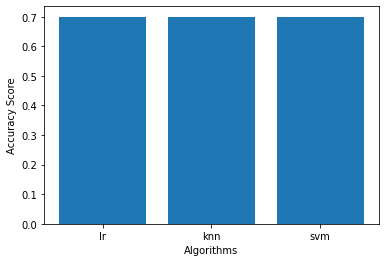

In [ ]:
plt.bar(x=['lr','knn','svm'],height=[lr_ac,knn_ac,svm_ac])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.show()